<a href="https://colab.research.google.com/github/MAU143429/IA-Laboratorios/blob/error/Laboratorio_Indices_de_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio – Índices de error

In [1]:
'''
Importando las librerías que nos permiten generar los valores aleatorios
y realizar los calculos.
'''
import random
import decimal
import statistics
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets


1. Genere un set de datos con comportamiento lineal (puede utilizar una librería
para generar este set) de 100 mil datos, calcule la regresión lineal. Puede
reutilizar los datos del lab de Regresión Lineal (5 pts)



In [2]:
x, y, coef = datasets.make_regression(n_samples=100,
                                      n_features=1,
                                      n_informative=1,
                                      noise=10,
                                      coef=True,
                                      random_state=0) 

X = [item for value in x for item in value]
Y = y.tolist()

DataSet  = []
DataSet.append(X)
DataSet.append(Y)

In [3]:
# Algoritmo de Regresión Lineal utilizado en el Lab 1

'''
Método Linear Regression

Este método permite generar una cantidad ¨n¨ de datos aleatorios.

@param n es el numero de tuplas de datos a crear
@return dataSet lista que contiene los datos creados.

'''


def LinearRegresion():

    add_xi_yi = 0
    add_xi_xm_2 = 0
    averageWeight = statistics.mean(DataSet[0])
    averageHeight = statistics.mean(DataSet[1])
    
    add_xi_xm = 0
    add_yi_ym = 0
    
    for index, element in enumerate(DataSet[0]):
        
        xi_xm = (element - averageWeight)
        yi_ym = (DataSet[1][index] - averageHeight)
        xi_xm_2 = (xi_xm**2)
        
        add_xi_xm += (xi_xm**2)
        add_yi_ym += (yi_ym**2)
        
        add_xi_yi += xi_xm * yi_ym
        add_xi_xm_2+=xi_xm_2
        
        
    b = add_xi_yi / add_xi_xm_2
    a = averageHeight - (b* averageWeight)
    
    print("La ecuación de regresión lineal es: " + "y = " , b , "x + ", a)
      
    return(b,a)
    
  

result = LinearRegresion()
b = result[0]
a = result[1]

La ecuación de regresión lineal es: y =  42.619430291366946 x +  -0.814181827030726


2. Calcule diferentes índices de error sobre la regresión. Los algoritmos deben ser
programados por usted. No se permite que utilice métodos ya programados de
librerías. 

*   Calcule el Error Medio Absoluto (MAE). (20 pts)




In [4]:

def MAE():
  n = len(DataSet[0])
  sum = 0
  for i in range(n):
    expectaded = ((DataSet[0][i]*b)+a)
    real = DataSet[1][i]
    sub = abs(real - expectaded)
    sum = sum + sub

  return  sum / n

print("El Error Medio Abdoluto (MAE) es de ", MAE())


El Error Medio Abdoluto (MAE) es de  8.774197468816451


*   Calcule el Error Medio Cuadrático (MSE). (20 pts)

In [5]:
def MSE():
    y_true = DataSet[0]
    y_pred = DataSet[1]
    n = len(y_true)
    error = 0
    for i in range(n):
        error += (y_true[i] - y_pred[i])**2
    return error / n

print("El Error Medi Cudrático es de: ", MSE())

El Error Medi Cudrático es de:  1876.5685733026946


*   Calcule el Root Mean Squared Error (RMSE). (20 pts)


In [6]:
def RMSE():
    y_true = DataSet[0]
    y_pred = DataSet[1]
    n = len(y_true)
    error = 0
    for i in range(n):
        error += (y_true[i] - y_pred[i])**2
    mse = error / n
    rmse = mse**(1/2)
    return rmse

print("El Root Mean Square Error es de:", RMSE())


El Root Mean Square Error es de: 43.3193787271089


3. Gráfique en 2D las observaciones y sus errores como se muestra en la siguiente
figuera (10 pts)

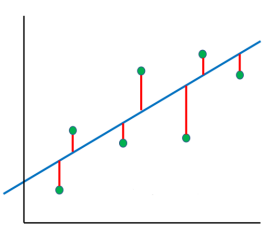


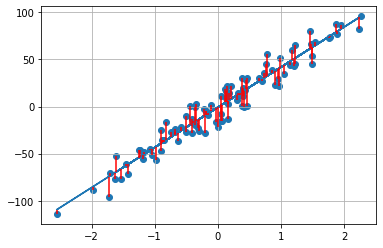

In [7]:
(m, b) = np.polyfit(DataSet[0], DataSet[1], 1)
yp = np.polyval([m,b],DataSet[0])
plt.plot(DataSet[0], yp)
plt.grid(True)
plt.scatter(DataSet[0],DataSet[1])

for x in range(len(DataSet[0])):
  limit = []
  limit.append((m*DataSet[0][x])+b)
  limit.append(DataSet[1][x])
  plt.vlines(x = DataSet[0][x], color = 'red',ymin = min(limit), ymax = max(limit))

4. Saque conclusiones a partir de los índices de error calculados en este laboratorio.
Sea analítico y extensivo en sus conclusiones.(25 pts)

Como se estudió en la clase, el estudio de los errores de predicción son una medida importante del rendimiento de un modelo de regresión lineal, y existen varias formas de calcular estos errores. Entre las medidas más comunes se encuentran el Error Medio Absoluto (MAE), el Error Medio Cuadrático (MSE) y la Raíz del Error Medio Cuadrático (RMSE).

De una manera general, el MAE es más fácil de interpretar ya que representa la magnitud promedio de los errores en las unidades originales de la variable dependiente, por el otro lado el MSE puede subestimar la importancia de los errores grandes debido a que utiliza el valor absoluto de los errores, además, el primero no considera si los errores son positivos o negativos. Por otro lado, el MSE utiliza el cuadrado de los errores para eliminar la ambigüedad de los signos y dar una mayor ponderación a los errores grandes.

El RMSE se utiliza comúnmente como una medida de evaluación del modelo debido a que combina las ventajas del MAE y del MSE al considerar tanto la magnitud de los errores como su dispersión en torno al valor real. El RMSE también tiene la misma unidad de medida que la variable dependiente original, lo que facilita su interpretación.

Com conclusión final, la elección del error de predicción depende de las necesidades específicas del análisis y de la importancia relativa que se le dé a los errores grandes y pequeños. En general, el RMSE es una buena opción para evaluar el rendimiento de un modelo de regresión lineal.